# sklearn中的决策树
- tree.DecisionTreeClassifier
- tree.DecisionTreeRegressor
- tree.export_graphviz
- tree.ExtraTreeClassifier
- tree.ExtraTreeRegressor

### 分类树对应的代码是:
```python
from sklearn import tree            #导入需要的模块

clf = tree.DecisionTreeClassifier() #实例化
clf = clf.fit(X_train,y_train)      #用训练集数据训练模型
result = clf.score(X_test,y_test)   #导入测试集，从接口中调用需要的信息

```
## 决策树DecisionTreeClassifier

class **sklearn.tree.DecisionTreeClassifier** (criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

### 重要参数
- criterion

  为了要将表格转化为一棵树，决策树需要找出最佳节点和最佳的分枝方法，对分类树来说，衡量这个“最佳”的指标 叫做“不纯度”。通常来说，不纯度越低，决策树对训练集的拟合越好。现在使用的决策树算法在分枝方法上的核心 大多是围绕在对某个不纯度相关指标的最优化上。
    不纯度基于节点来计算，树中的每个节点都会有一个不纯度，并且子节点的不纯度一定是低于父节点的，也就是 说，在同一棵决策树上，叶子节点的不纯度一定是最低的。
    Criterion这个参数正是用来决定不纯度的计算方法的。sklearn提供了两种选择: 
    1. 输入”entropy“，使用信息熵(Entropy) 
        $$
        Entropy(t) = - \sum_{i=0}^{c-1}{p(i|t)log{_2}{p(i|t)}}
        $$
    2. 输入”gini“，使用基尼系数(Gini Impurity)
        $$
        Gini(t) = 1 - \sum_{i=0}^{c-1}{p(i|t)^2}
        $$
        
  其中t代表给定的节点，i代表标签的任意分类， 代表标签分类i在节点t上所占的比例。注意，当使用信息熵 时，sklearn实际计算的是基于信息熵的信息增益(Information Gain)，即父节点的信息熵和子节点的信息熵之差。
  比起基尼系数，信息熵对不纯度更加敏感，对不纯度的惩罚最强。但是**在实际使用中，信息熵和基尼系数的效果基本相同**。信息熵的计算比基尼系数缓慢一些，因为基尼系数的计算不涉及对数。另外，因为信息熵对不纯度更加敏 感，所以信息熵作为指标时，决策树的生长会更加“精细”，因此对于高维数据或者噪音很多的数据，信息熵很容易 过拟合，基尼系数在这种情况下效果往往比较好。当模型拟合程度不足的时候，即当模型在训练集和测试集上都表 现不太好的时候，使用信息熵。当然，这些不是绝对的。


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn import tree

In [2]:
wine = load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine.data.shape

(178, 13)

In [6]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names 

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [10]:
Xtrain.shape

(124, 13)

In [11]:
Xtest

array([[1.305e+01, 5.800e+00, 2.130e+00, 2.150e+01, 8.600e+01, 2.620e+00,
        2.650e+00, 3.000e-01, 2.010e+00, 2.600e+00, 7.300e-01, 3.100e+00,
        3.800e+02],
       [1.243e+01, 1.530e+00, 2.290e+00, 2.150e+01, 8.600e+01, 2.740e+00,
        3.150e+00, 3.900e-01, 1.770e+00, 3.940e+00, 6.900e-01, 2.840e+00,
        3.520e+02],
       [1.229e+01, 1.410e+00, 1.980e+00, 1.600e+01, 8.500e+01, 2.550e+00,
        2.500e+00, 2.900e-01, 1.770e+00, 2.900e+00, 1.230e+00, 2.740e+00,
        4.280e+02],
       [1.363e+01, 1.810e+00, 2.700e+00, 1.720e+01, 1.120e+02, 2.850e+00,
        2.910e+00, 3.000e-01, 1.460e+00, 7.300e+00, 1.280e+00, 2.880e+00,
        1.310e+03],
       [1.272e+01, 1.750e+00, 2.280e+00, 2.250e+01, 8.400e+01, 1.380e+00,
        1.760e+00, 4.800e-01, 1.630e+00, 3.300e+00, 8.800e-01, 2.420e+00,
        4.880e+02],
       [1.237e+01, 1.070e+00, 2.100e+00, 1.850e+01, 8.800e+01, 3.520e+00,
        3.750e+00, 2.400e-01, 1.950e+00, 4.500e+00, 1.040e+00, 2.770e+00,
        6.60

In [44]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest) #返回预测的准确度accuracuy
score

0.8888888888888888

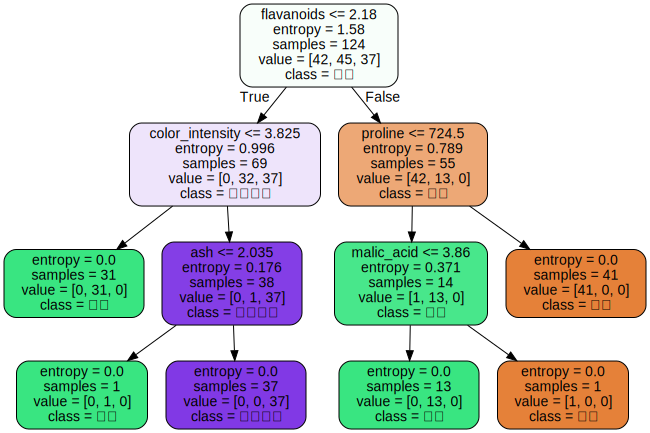

In [45]:
import graphviz

dot_data = tree.export_graphviz(clf
                                ,feature_names = wine.feature_names
                                ,class_names = ['琴酒','雪莉','贝尔摩德']
                                ,filled = True
                                ,rounded = True
                                )

graph = graphviz.Source(dot_data)
graph

In [26]:
clf.feature_importances_

array([0.        , 0.02652203, 0.03404509, 0.        , 0.        ,
       0.        , 0.42779018, 0.        , 0.        , 0.31673296,
       0.        , 0.        , 0.19490974])

特征及重要性


In [27]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.026522028140126958),
 ('ash', 0.0340450918349292),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.42779017776954126),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.31673295830138154),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.19490974395402116)]

### random_statae和split参数防止过拟合

In [35]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state = 30)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest) #返回预测的准确度accuracuy
score

0.8518518518518519

In [46]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0,splitter='random')
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest) #返回预测的准确度accuracuy
score

0.9814814814814815

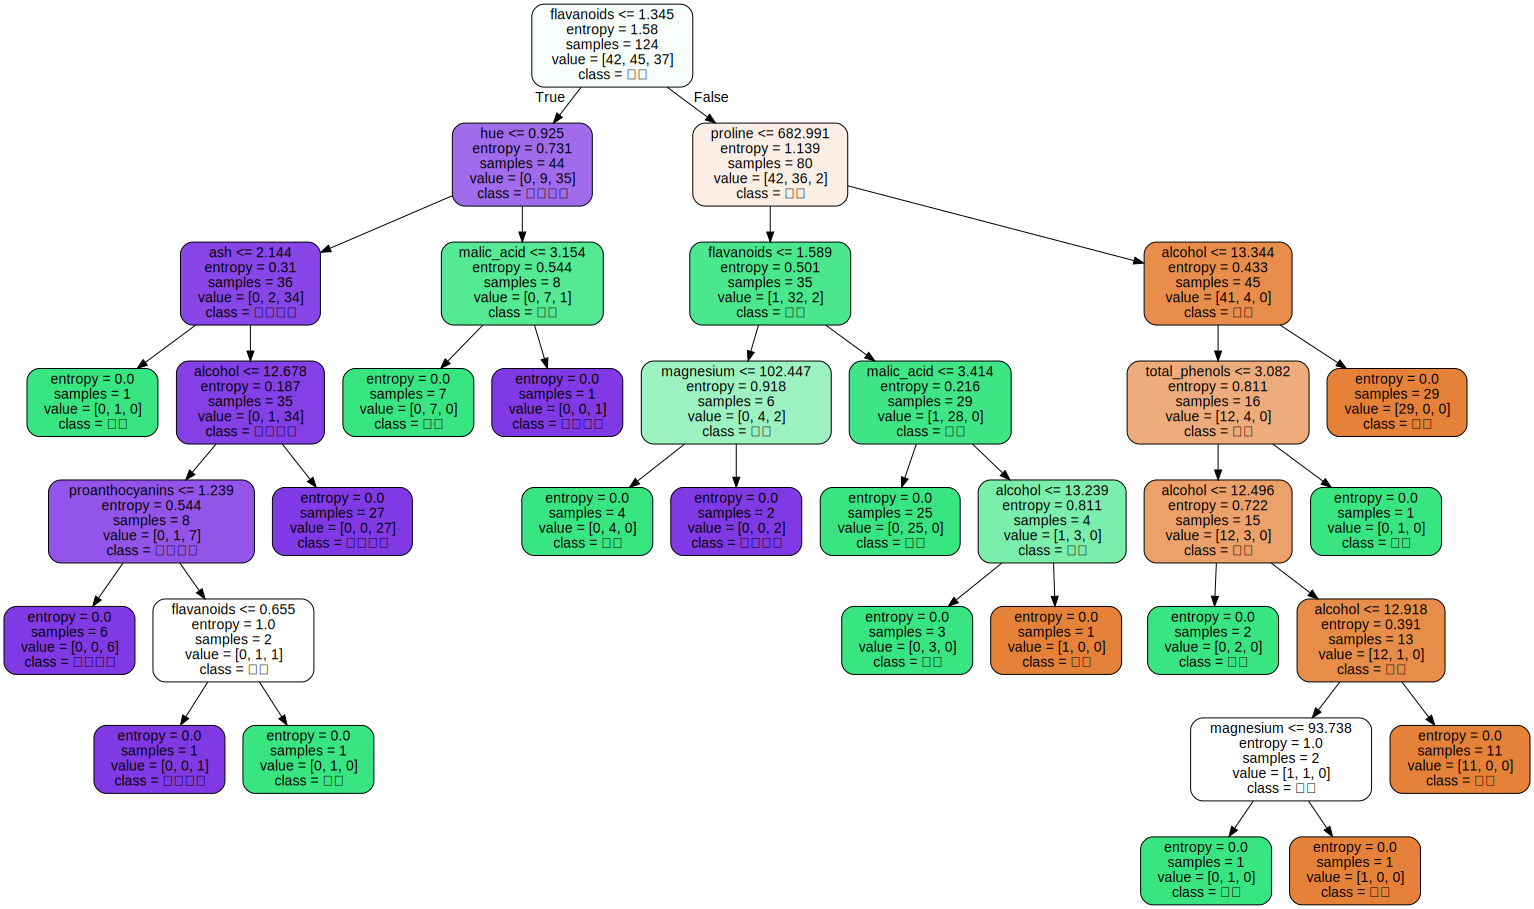

In [43]:
import graphviz

dot_data = tree.export_graphviz(clf
                                ,feature_names = wine.feature_names
                                ,class_names = ['琴酒','雪莉','贝尔摩德']
                                ,filled = True
                                ,rounded = True
                                )

graph = graphviz.Source(dot_data)
graph

### 我们的树对训练集对拟合程度如何?

In [47]:
score_train = clf.score(Xtrain,Ytrain)
score_train

1.0

### 剪枝参数防止过拟合
 - max_depth
  限制树的最大深度. 在高纬度低样本时非常有效,建议开始从3开始尝试.
 - min_samples_leaf & min_samples_split
 限制叶子节点的参数
   - min_samples_leaf
   一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生.一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引 起过拟合，设置得太大就会阻止模型学习数据。一般来说，建议从=5开始使用。如果叶节点中含有的样本量变化很 大，建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题 中避免低方差，过拟合的叶子节点出现。对于类别不多的分类问题，=1通常就是最佳选择。
   - min_samples_split
   一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生。
 - max_features & min_impurity_decrease
   - max_features 
   max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。和max_depth异曲同工，max_features是用来限制高维度数据的过拟合的剪枝参数，但其方法比较暴力，是直接限制可以使用的特征数量 而强行使决策树停下的参数，在不知道决策树中的各个特征的重要性的情况下，强行设定这个参数可能会导致模型 学习不足。如果希望通过降维的方式防止过拟合，建议使用PCA，ICA或者特征选择模块中的降维算法。
   - min_impurity_decrease
   限制信息增益的大小，信息增益小于设定数值的分枝不会发生。

In [82]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state = 10
                                  ,splitter='random'
                                  ,max_depth = 4
                                  #,min_samples_leaf = 10
                                  #,min_samples_split = 25
                                  
                                 )
clf = clf.fit(Xtrain,Ytrain)

dot_data = tree.export_graphviz(clf
                                ,feature_names = wine.feature_names
                                ,class_names = ['琴酒','雪莉','贝尔摩德']
                                ,filled = True
                                ,rounded = True
                                )

graph = graphviz.Source(dot_data)
#graph


In [83]:
score = clf.score(Xtest,Ytest)
score

0.9259259259259259

#### 确认最优的剪枝参数
使用确定超参数的曲线来进行判断了，继续使用我们 已经训练好的决策树模型clf。超参数的学习曲线，是一条以超参数的取值为横坐标，模型的度量指标为纵坐标的曲 线，它是用来衡量不同超参数取值下模型的表现的线。在我们建好的决策树里，我们的模型度量指标就是score。
思考:
1. 剪枝参数一定能够提升模型在测试集上的表现吗? - 调参没有绝对的答案，一切都是看数据本身。
2. 这么多参数，一个个画学习曲线? - 在泰坦尼克号的案例中，我们会解答这个问题。

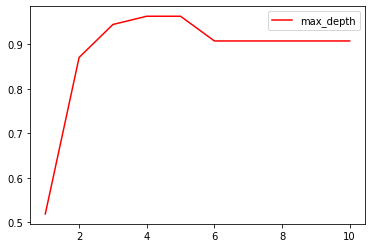

In [84]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1 
                                      ,criterion="entropy"
                                      ,random_state=30
                                      ,splitter="random"
                                      )
    clf = clf.fit(Xtrain, Ytrain) 
    score = clf.score(Xtest, Ytest)
    test.append(score)
                                      
plt.plot(range(1,11),test,color="red",label="max_depth") 
plt.legend()
plt.show()


#### 目标权重参数
- class_weight & min_weight_fraction_leaf
  
  完成样本标签平衡的参数。样本不平衡是指在一组数据集中，标签的一类天生占有很大的比例。比如说，在银行要 判断“一个办了信用卡的人是否会违约”，就是是vs否(1%:99%)的比例。这种分类状况下，即便模型什么也不做，全把结果预测成“否”，正确率也能有99%。因此我们要使用class_weight参数对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模。该参数默认None，此模式表示自动给 与数据集中的所有标签相同的权重。有了权重之后，样本量就不再是单纯地记录数目，而是受输入的权重影响了，因此这时候剪枝，就需要搭配min_ weight_fraction_leaf这个基于权重的剪枝参数来使用。另请注意，基于权重的剪枝参数(例如min_weight_ fraction_leaf)将比不知道样本权重的标准(比如min_samples_leaf)更少偏向主导类。如果样本是加权的，则使 用基于权重的预修剪标准来更容易优化树结构，这确保叶节点至少包含样本权重的总和的一小部分。
  
### 重要属性和接口 
  属性是在模型训练之后，能够调用查看的模型的各种性质。对决策树来说，最重要的是feature_importances_，能够查看各个特征对模型的重要性。
  sklearn中许多算法的接口都是相似的，比如说我们之前已经用到的fit和score，几乎对每个算法都可以使用。除了 这两个接口之外，决策树最常用的接口还有apply和predict。apply中输入测试集返回每个测试样本所在的叶子节 点的索引predict输入测试集返回每个测试样本的标签。返回的内容一目了然并且非常容易，大家感兴趣可以自己 下去试试看。
在这里不得不提的是，所有接口中要求输入X_train和X_test的部分，输入的特征矩阵必须至少是一个二维矩阵。 sklearn不接受任何一维矩阵作为特征矩阵被输入。如果你的数据的确只有一个特征，那必须用reshape(-1,1)来给 矩阵增维;如果你的数据只有一个特征和一个样本，使用reshape(1,-1)来给你的数据增维。

In [85]:
#apply 返回每个测试样本所在的叶子结点的索引
clf.apply(Xtest)

array([19, 19, 19, 30, 19, 29, 19, 30, 10, 30, 19, 30, 30, 19, 30, 10, 10,
       30, 30, 30, 23, 19, 19, 19, 23, 19, 30, 10, 30, 10, 19, 17, 19, 16,
       30, 19,  7, 19, 30, 19, 10, 19, 10, 30,  6,  7, 30,  8, 28, 30,  7,
       10, 30, 19])

In [86]:
#predict返回每个测试样本的分类/回归结果 clf.predict(Xtest)
clf.predict(Xtest)

array([1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 2, 0,
       1, 1, 0, 2, 0, 0, 1, 2, 0, 1])

## 回归树 DecisionTreeRegressor
class sklearn.tree.DecisionTreeRegressor (criterion=’mse’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
几乎所有参数，属性及接口都和分类树一模一样。需要注意的是，在回归树种，没有标签分布是否均衡的问题，因 此没有class_weight这样的参数。
### 重要参数，属性及接口 criterion
回归树衡量分枝质量的指标，支持的标准有三种:
1. 输入"mse"使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为特征选择的标准，这种方法通过使用叶子节点的均值来最小化L2损失 
2. 输入“friedman_mse”使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差 
3. 输入"mae"使用绝对平均误差MAE(mean absolute error)，这种指标使用叶节点的中值来最小化L1损失 属性中最重要的依然是feature_importances_，接口依然是apply, fit, predict, score最核心。

$$
MSE = \cfrac{1}{N} \sum_{i=1}^{N}(f_i-y_i)^2
$$

其中N是样本数量，i是每一个数据样本，$f_i$是模型回归出的数值，$y_i$是样本点i实际的数值标签。所以MSE的本质， 其实是样本真实数据与回归结果的差异。在回归树中，**MSE不只是我们的分枝质量衡量指标，也是我们最常用的衡量回归树回归质量的指标**，当我们在使用交叉验证，或者其他方式获取回归树的结果时，我们往往选择均方误差作 为我们的评估(在分类树中这个指标是score代表的预测准确率)。在回归中，我们追求的是，MSE越小越好。
然而，**回归树的接口score返回的是R平方**(越接近1越好)，并不是MSE。R平方被定义如下:
    $$
    R^2 = 1- \cfrac{u}{v} \\
    u = \sum_{i=1}^{N}(f_i - y_i)^2 \qquad
    v = \sum_{i=1}^{N}(y_i - \hat y)
    $$
其中u是残差平方和(MSE * N)，v是总平方和，N是样本数量，i是每一个数据样本，fi是模型回归出的数值，yi 是样本点i实际的数值标签。y帽是真实数值标签的平均数。R平方可以为正为负(如果模型的残差平方和远远大于 模型的总平方和，模型非常糟糕，R平方就会为负)，而均方误差永远为正。
值得一提的是，**虽然均方误差永远为正，但是sklearn当中使用均方误差作为评判标准时，却是计算”负均方误差“(neg_mean_squared_error)**。这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均 方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示。真正的 均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字。

### 简单看看回归树是怎样工作的



In [21]:
#交叉验证cross_val_score的用法
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
regressor = DecisionTreeRegressor(random_state=0) #实例化
cross_val_score(regressor, boston.data, boston.target, cv=10
                , scoring = "neg_mean_squared_error"
               ) 


array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

**交叉验证是用来观察模型的稳定性的一种方法**，我们将数据划分为n份，依次使用其中一份作为测试集，其他n-1份 作为训练集，多次计算模型的精确性来评估模型的平均准确程度。训练集和测试集的划分会干扰模型的结果，因此 用交叉验证n次的结果求出的平均值，是对模型效果的一个更好的度量。
$$
E = \cfrac{1}{N}\sum_{i=1}^{n}{E_i}
$$

### 实例:一维回归的图像绘制

In [2]:
#导入需要的库
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
import matplotlib.pyplot as plt

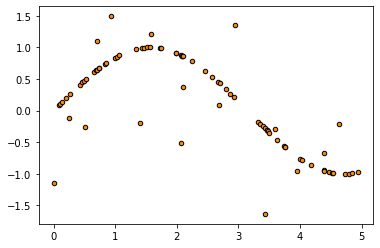

In [6]:
#创建一条含有噪声的正弦曲线
#在这一步，我们的基本思路是，先创建一组随机的，分布在0~5上的横坐标轴的取值(x)，
#然后将这一组值放到sin函数中去生成纵坐标的值(y)，接着再到y上去添加噪声。
#全程我们会使用numpy库来为我们生成这个正弦曲线。
rng =  np.random.RandomState(1)      #生成随机数种子
X = np.sort(5*rng.rand(80,1),axis=0) #np.random.rand(数组结构)，生成随机数组的函数(0,1)
y = np.sin(X).ravel()                #y数据只能有一维
y[::5] += 3 * (0.5 - rng.rand(16))  #增加噪声,步长5,增加或减少一个数

#了解降维函数ravel()的用法 
#np.random.random((2,1)) 
#np.random.random((2,1)).ravel() 
#np.random.random((2,1)).ravel().shape

plt.figure()
plt.scatter(X,y,s=20,edgecolor="black",c="darkorange", label="data")

In [29]:
#实例化&训练模型
regr_1 = DecisionTreeRegressor(max_depth=2) 
regr_2 = DecisionTreeRegressor(max_depth=5) 
regr_1.fit(X, y)
regr_2.fit(X, y)


DecisionTreeRegressor(max_depth=5)

In [30]:
#np.arrange(开始点，结束点，步长) 生成有序数组的函数
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] #[:, np.newaxis]增维
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


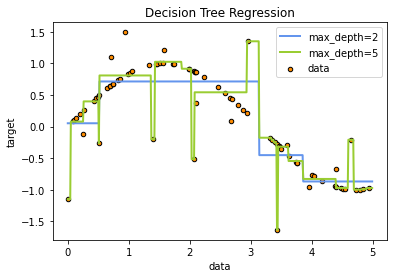

In [31]:
#绘制图像
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data") 
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2) 
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2) 
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


可见，回归树学习了近似正弦曲线的局部线性回归。我们可以看到，如果树的最大深度(由max_depth参数控制) 设置得太高，则决策树学习得太精细，它从训练数据中学了很多细节，包括噪声得呈现，从而使模型偏离真实的正 弦曲线，形成过拟合。


## 分类树在合成数集上的表现



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification 
from sklearn.tree import DecisionTreeClassifier

In [2]:
#我们先从sklearn自带的数据库中生成三种类型的数据集:1)月亮型数据，2)环形数据，3)二分型数据

#make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100,         #生成100个样本
                           n_features=2,          #包含2个特征，即生成二维数据 
                           n_redundant=0,         #添加冗余特征0个 
                           n_informative=2,       #包含信息的特征是2个
                           random_state=1,        #随机模式
                           n_clusters_per_class=1 #每个簇内包含的标签类别有1个 
                          )


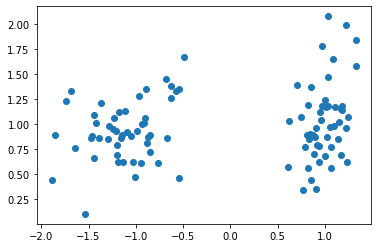

In [6]:
plt.scatter(X[:,0],X[:,1])

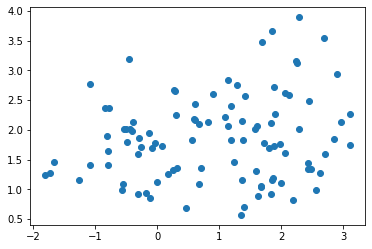

In [13]:
#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成随机数组，
#通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏 
#注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，两个簇的数据会混合在一起，分类器的效应会继续下降

rng = np.random.RandomState(2)          #生成一种随机模式
X += 2 * rng.uniform(size=X.shape)      #加减2*[0,1)之间的均匀分布的样本
linearly_separable = (X, y)             #生成了新的X，依然可以画散点图来观察一下特征的分布 
plt.scatter(X[:,0],X[:,1])

In [14]:
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0)
            ,make_circles(noise=0.2, factor=0.5, random_state=1)
            ,linearly_separable
           ]

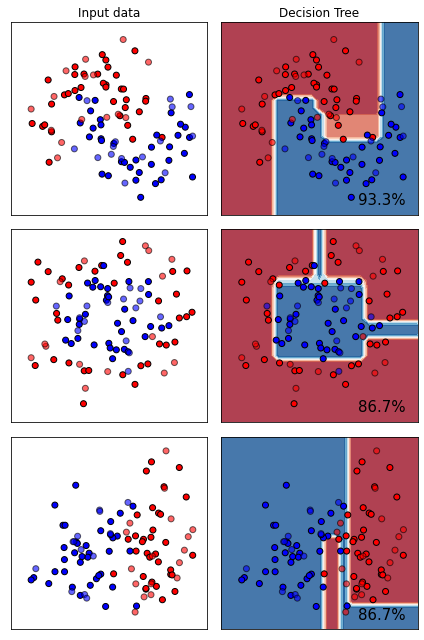

In [21]:
#创建画布，宽高比为6*9
figure = plt.figure(figsize=(6, 9)) 
#设置用来安排图像显示位置的全局变量i 
i=1

for ds_index,ds in enumerate(datasets):
    X,y = ds
    X = StandardScaler().fit_transform(X)
    Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=25)
    
    #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，创造一个比两个特征的区间本身更大 一点的区间
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5 
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点 
    #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长 
    #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。 
    #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵 
    #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
    
    array1,array2 = np.meshgrid(np.arange(x1_min,x1_max,0.2)
                               ,np.arange(x2_min,x2_max,0.2)
                               )
    #接下来生成彩色画布 
    cm = plt.cm.RdBu
    #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝 
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上 
    ax = plt.subplot(len(datasets), 2, i)
    
    #到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题 
    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件 
    if ds_index == 0:
        ax.set_title("Input data")
        
    #将数据集的分布放到我们的坐标系上
    #先放训练集
    ax.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain,
               cmap=cm_bright,edgecolors='k') 
    #放测试集
    ax.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest,
               cmap=cm_bright, alpha=0.6,edgecolors='k')
    
    #为图设置坐标轴的最大值和最小值并设定没有坐标轴 
    ax.set_xlim(array1.min(), array1.max()) 
    ax.set_ylim(array2.min(), array2.max()) 
    ax.set_xticks(())
    ax.set_yticks(()) 
    
    #每次循环之后，改变i的取值让图每次位列不同的位置
    i += 1
    
    #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置 
    #在这里，len(datasets)其实就是3，2是两列 #在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值是2，4，6
    ax = plt.subplot(len(datasets),2,i)
    #决策树的建模过程:实例化 → fit训练 → score接口得到预测的准确率 
    clf = DecisionTreeClassifier(max_depth=5) 
    clf.fit(Xtrain, ytrain)
    score = clf.score(Xtest, ytest)

    #绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max] 
    #分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率 
    #类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量 #由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入结构相同的数组，即是说，必须有两个特征 
    #ravel()能够将一个多维数组转换成一维数组 
    #np.c_是能够将两个数组组合起来的函数
    #在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策 树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，切出类概率
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1] #np.c_[np.array([1,2,3]), np.array([4,5,6])]
    #将返回的类概率作为数据，放到contourf里面绘制去绘制轮廓
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)

    #将数据集的分布放到我们的坐标系上
    # 将训练集放到图中去
    ax.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, cmap=cm_bright,
           edgecolors='k') 
    # 将测试集放到图中去
    ax.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, cmap=cm_bright, edgecolors='k', alpha=0.6)
    #为图设置坐标轴的最大值和最小值 
    ax.set_xlim(array1.min(), array1.max()) 
    ax.set_ylim(array2.min(), array2.max()) 
    #设定坐标轴不显示标尺也不显示数字 
    ax.set_xticks(())
    ax.set_yticks(())

    #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件 
    if ds_index == 0:
        ax.set_title("Decision Tree")
    
    #写在右下角的数字
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
            size=15, horizontalalignment='right')

    #让i继续加一
    i += 1

plt.tight_layout()
plt.show()